<a href="https://colab.research.google.com/github/Annie-Yeeun-Jang/text_style_transfer_Tobigs/blob/main/preprocessing/COCA_final_preprocessed_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
# nltk sentence splitter 사용할지 안할지 몰라서 일단 만들어 놓음
# punkt_param = PunktParameters()
# prefixes = ['Mr', 'Mrs', 'St', 'MS', 'Dr', 'Prof', 'Capt', 'Cpt', 'Lt', 'Mt', 'Jr']
# prefixes_low = [pref.lower() for pref in prefixes]
# punkt_param.abbrev_types = set(prefixes + prefixes_low)
# sentence_splitter = PunktSentenceTokenizer(punkt_param)

In [176]:
!pip install contractions
import seaborn as sns
import re
import nltk 
import os
from bs4 import BeautifulSoup
import contractions
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [201]:
# https://stackoverflow.com/questions/4576077/how-can-i-split-a-text-into-sentences
# sentence splitter function
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|Mt|Jr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She \s|It \s|They \re|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|me|edu)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    if "..." in text: text = text.replace("...","<prd><prd><prd>")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [ ]:
def html_preprocessing(corpus):
  corpus = BeautifulSoup(corpus, 'lxml').text
  return corpus

def html_re_preprocessing(corpus):
  # html 기호들 전처리 
  corpus = re.sub("&nbsp;", " ", corpus)
  corpus = re.sub("&It;", "<", corpus)
  corpus = re.sub("%amp;", "and", corpus)
  corpus = re.sub("quot;", '"', corpus)
  corpus = re.sub("&#035;", "#", corpus)
  corpus = re.sub("&#039;", "'", corpus)
  return corpus

In [223]:
def preprocessing(corpus):
  corpus = html_preprocessing(corpus)
  corpus = corpus[10:]
  # 아래 코드는 html 요소들 지우기 위한 코드 
  corpus = re.sub("&nbsp;", " ", corpus)
  corpus = re.sub("&It;", "<", corpus)
  corpus = re.sub("%amp;", "and", corpus)
  corpus = re.sub("quot;", '"', corpus)
  corpus = re.sub("&#035;", "#", corpus)
  corpus = re.sub("&#039;", "'", corpus)

  # corpus = re.sub("\\'(.)", "'\\1", corpus)
  corpus = re.sub("wo n't", "won't", corpus)
  corpus = re.sub("(\$) ?([0-9])", "dollar \\2", corpus)
  corpus = re.sub("%", 'percent', corpus)
  corpus = re.sub("@!", "", corpus)
  corpus = re.sub("^[0-9a-zA-Z]([-_.]?[0-9a-zA-Z])*@[0-9a-zA-Z]([-_.]?[0-9a-zA-Z])*.[a-zA-Z]{2,3}$/i", "EMAIL", corpus) # 이메일
  corpus = re.sub('http : //\S+|https : //\S+', '', corpus, flags=re.MULTILINE) # not complete
  corpus = re.sub("[\(\[] ?.*? ?[\)\]]", '', corpus) 
  corpus = re.sub("[0-9]", " NUM ", corpus) 

  corpus = re.sub('\.', 'thisIsSpecialTokenForProd', corpus)
  corpus = re.sub(" ", "thisIsSpecialTokenForBlank", corpus)
  corpus = re.sub("(\W){2,}", "\\1", corpus)
  corpus = re.sub("thisIsSpecialTokenForProd", ".", corpus)
  corpus = re.sub("thisIsSpecialTokenForBlank", " ", corpus)
  
  corpus = re.sub("\.{2,}", ".", corpus)
  corpus = split_into_sentences(corpus)
  corpus = [sentence for sentence in corpus if (len(sentence.split(" ")) > 3) and (" @ @ @ @ @ @ @ @ @ @ " not in sentence)]
  return corpus

In [210]:
raw_path = "/content/drive/Shareddrives/text_conf/dataset/raw/"
coca_path = "COCA/coca-samples-text/"
gyafc_path = "GYAFC/GYAFC_Corpus"
save_path = "/content/drive/Shareddrives/text_conf/dataset/preprocessed/"
coca_save_path = "native/"

In [214]:
coca_files = [file for file in os.listdir(raw_path + coca_path) if "0_" in file]

--------------------------------------------------
0_text_acad.txt
--------------------------------------------------
전체 문장 수 : 44835
전체 단어 수 : 49361
문장 평균 단어 수 : 23.739
문장 최대 최소 단어 수 : (215, 3)
None
--------------------------------------------------
0_text_blog.txt
--------------------------------------------------
전체 문장 수 : 58005
전체 단어 수 : 74196
문장 평균 단어 수 : 19.740
문장 최대 최소 단어 수 : (205, 3)
None
--------------------------------------------------
0_text_mag.txt
--------------------------------------------------
전체 문장 수 : 55980
전체 단어 수 : 100724
문장 평균 단어 수 : 21.611
문장 최대 최소 단어 수 : (194, 4)
None
--------------------------------------------------
0_text_news.txt
--------------------------------------------------
전체 문장 수 : 53487
전체 단어 수 : 116798
문장 평균 단어 수 : 20.728
문장 최대 최소 단어 수 : (336, 4)
None
--------------------------------------------------
0_text_web.txt
--------------------------------------------------
전체 문장 수 : 51243
전체 단어 수 : 127940
문장 평균 단어 수 : 20.400
문장 최대 최소 단어 수 : (239, 4)
None

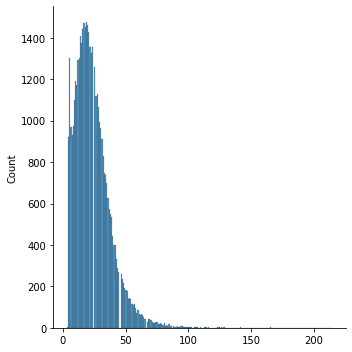

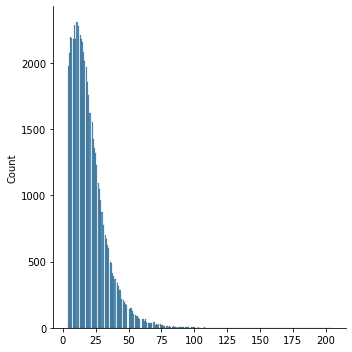

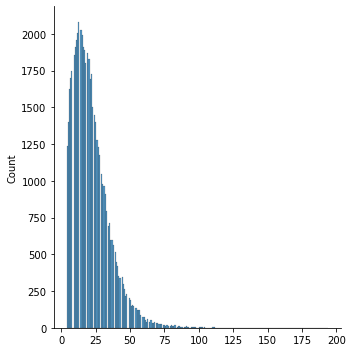

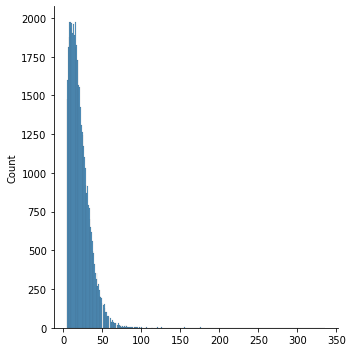

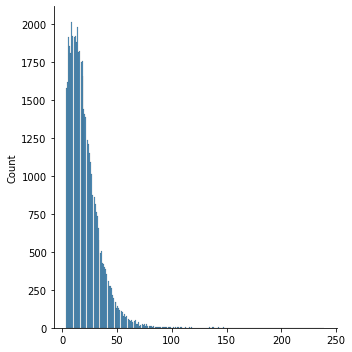

In [226]:
for coca in coca_files:
  with open(raw_path+coca_path+coca, encoding = 'UTF-8', newline = '\n') as f:
    corpus = f.readlines()[1:]
    preprocessed = [preprocessing(sent) for sent in corpus]
    print("-"*50)
    print(coca)
    print("-"*50)
    print(EDA(sum(preprocessed, [])))
    with open(save_path+coca_save_path+coca, encoding = "UTF-8", newline = "\n", mode = "w") as g:
      g.writelines(sum(preprocessed, []))

In [287]:
for coca in coca_files:
  with open(raw_path+coca_path+coca, encoding = 'UTF-8', newline = '\n') as f:
    corpus = f.readlines()[1:]
    preprocessed = [preprocessing(sent) for sent in corpus]
    print("-"*50)
    print("-"*50)
    print("-"*50)
    print(coca)
    print("-"*50)
    print("-"*50)
    print("-"*50)
    print("-"*50)
    print(*sum(preprocessed, [])[:1000], sep = "\n")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
I have come close to implying that the Ninth Edition of the Encyclopaedia Britannica was a kind of father figure to me .
At that time , all these sentiments were also true of my unquestioned attitudes toward my father .
Writing my own article for the EB was a psychological landmark ; it gave me a voice of my own .
I suddenly felt like Ernest Pontifex , in The Way of All Flesh , who was finally able to contravene his father without feeling that he was either destroying or betraying him .
Before I wrote my  NUM  NUM  NUM  NUM  article , I looked at two or three earlier pieces .
It did not occur to me then to view them as documents of intellectual history ; I merely wished to identify my predecessors ' pitfalls - such as an overreliance on dreary tables of statistics - so I could avoid stepping into them myself .
I wrote the article and proudly added the Fourteenth Edition of the Britannica to the Ninth Edition that still reposed in the glass-fronted St